In [298]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree



In [300]:
#Load Dataset 
df = pd.read_csv('diabetes.csv')

In [301]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [302]:
#Dataset quick peek - PART A
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## PART A : Data Preprocessing

In [303]:
#Show first 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [304]:
#Check for missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [305]:
#display basic statistics 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [306]:
#Data cleaning 
#fill missing columns with media 
df.fillna(df.median(numeric_only=True), inplace=True)
#remove duplicates
df.duplicated().sum()
df = df.drop_duplicates()


In [307]:
##Feature Engineering 

# Seperate feature and target 
X = df.drop('Outcome', axis=1)
y = df['Outcome']

##Onehot encoding 

#Identify categorical features 
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Onehot encoding categorical features 
if len(categorical_features) > 0:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    X_categorical = onehot_encoder.fit_transform(X[categorical_features])
    X_categorical = pd.DataFrame(X_categorical, columns=onehot_encoder.get_feature_names_out(categorical_features))
else:
    X_categorical = pd.DataFrame(columns=[])

#combine numerical and categorical features 
X_all = pd.concat([X[numerical_features], X_categorical], axis=1)


In [308]:
#Feature Scaling 
scaler = StandardScaler()
X_all = scaler.fit_transform(X_all)
y = y.values.reshape(-1, 1)

In [309]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_all, y,train_size=0.7, test_size=0.3, random_state=42,stratify=y)

## PART B : Logistic Regression 

In [310]:
#Model 1: Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Evaluate Model 1 
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-score: {f1_lr}")
print(f"Confusion Matrix:\n {confusion_matrix_lr}")
print(f"ROC AUC Score: {roc_auc_lr}")

Logistic Regression Metrics:
Accuracy: 0.7445887445887446
Precision: 0.6774193548387096
Recall: 0.5185185185185185
F1-score: 0.5874125874125874
Confusion Matrix:
 [[130  20]
 [ 39  42]]
ROC AUC Score: 0.6925925925925926


t:\ml_model_eval\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


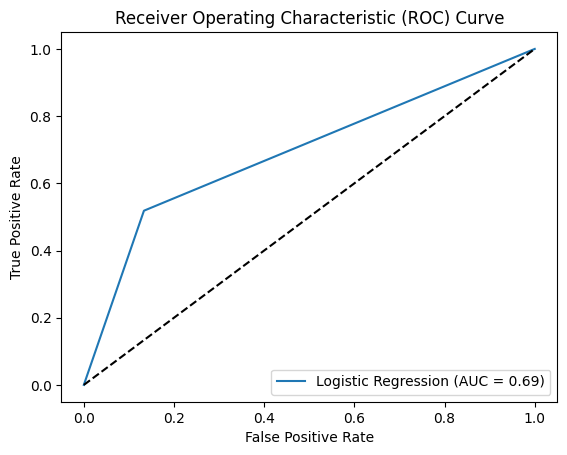

In [311]:
#ROC curve plot for Model 1
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression Metrics:
- Accuracy: 0.7445887445887446
- Precision: 0.6774193548387096
- Recall: 0.5185185185185185
- F1-score: 0.5874125874125874
- Confusion Matrix:
 [[130  20]
 [ 39  42]]
- ROC AUC Score: 0.6925925925925926

ROCK AUC is a better score than accuracy because it takes into account the true positive rate and false positive rate. Accuracy only takes into account the true positive rate.

## PART C: DECISION TREE 

In [312]:
#Model 2: Decision Tree 
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#Evaluate Model 2 
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")
print(f"Confusion Matrix:\n {confusion_matrix_dt}")
print(f"ROC AUC Score: {roc_auc_dt}")

Decision Tree Metrics:
Accuracy: 0.7662337662337663
Precision: 0.6901408450704225
Recall: 0.6049382716049383
F1-score: 0.6447368421052632
Confusion Matrix:
 [[128  22]
 [ 32  49]]
ROC AUC Score: 0.7291358024691358


Decision Tree Metrics:
- Accuracy: 0.7619047619047619
- Precision: 0.6805555555555556
- Recall: 0.6049382716049383
- F1-score: 0.6405228758169934
- Confusion Matrix:
 [[127  23]
 [ 32  49]]
- ROC AUC Score: 0.7258024691358025

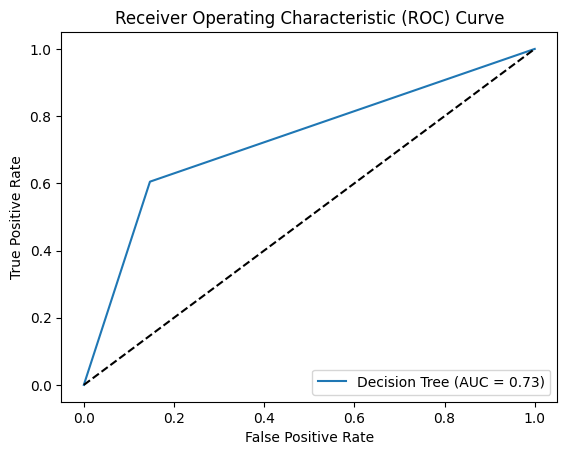

In [313]:
#ROC curve plot for Model 2 
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

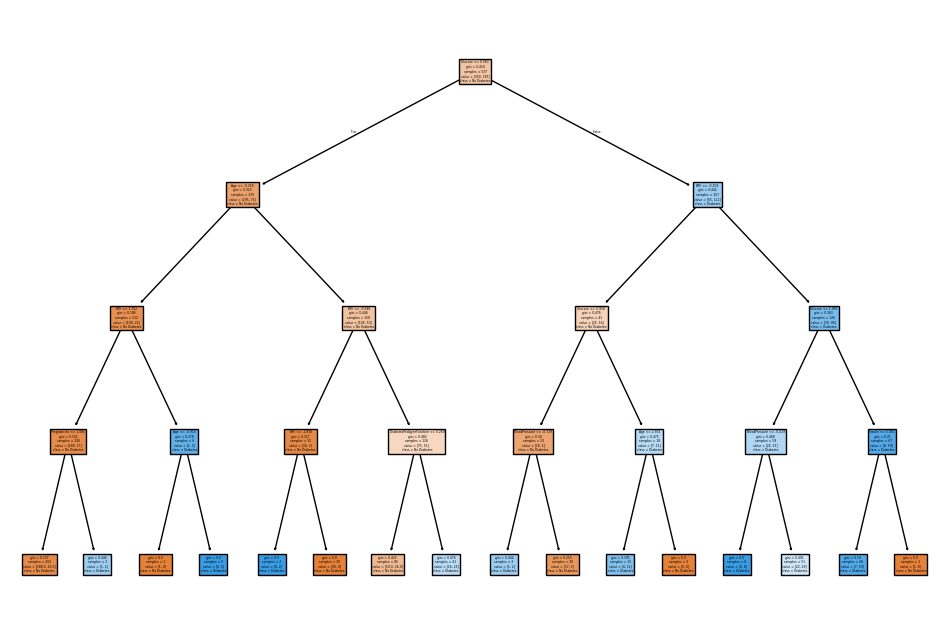

In [314]:
#Plot the Decision Tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(dt, feature_names=numerical_features, class_names=['No Diabetes', 'Diabetes'], filled=True, ax=ax)
plt.show()

In [315]:
# interpret the first split
first_split_feature = numerical_features[dt.tree_.feature[0]]
first_split_threshold = dt.tree_.threshold[0]
print(f"The first split is based on the feature '{first_split_feature}' with a threshold of {first_split_threshold}.")

The first split is based on the feature 'Glucose' with a threshold of 0.3632180392742157.


#### Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.
Decision Tree models real world decision making process. Logistic Regression is more interpretable for data scientists. Logistic regression's coefficients can be used to understand the impact of each feature on the outcome.


#### Which one would you prefer in a medical diagnosis scenario? Why?
I would prefer Decision Tree in a medical diagnosis scenario because it is easier to interpret for doctors as it models real world decision making process that doctors would be familiar with.  Logistic Regression is more interpretable for data scientists as it provides coefficients that can be used to understand the impact of each feature on the outcome.

## Part D: Comparison & Reflection

In [316]:
# Compare Logistic Regression and Decision Tree results (accuracy, precision, recall, F1, AUC) in tabular format
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_dt],
    'Precision': [precision_lr, precision_dt],  
    'Recall': [recall_lr, recall_dt],  
    'F1-score': [f1_lr, f1_dt],  
    'AUC': [roc_auc_lr, roc_auc_dt]  
})

print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  Logistic Regression  0.744589   0.677419  0.518519  0.587413  0.692593
1        Decision Tree  0.766234   0.690141  0.604938  0.644737  0.729136


### Which model performs better?
Decision tree performs better in all the evaluation metrics ( accuracy , precision , recall, f1-score and ROC AUC)

### Which model is easier to interpret for doctors?
Decision Tree is easier to interpret for doctors as its modeling process is more transparent and intuitive. It is also based 

If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?
If the dataset is imbalanced, f1 score is a better metric to use (combination of precision and recall). Also, Recall would be better than precision as precision is more sensitive to imbalanced datasets and we want to avoid false negatives.
